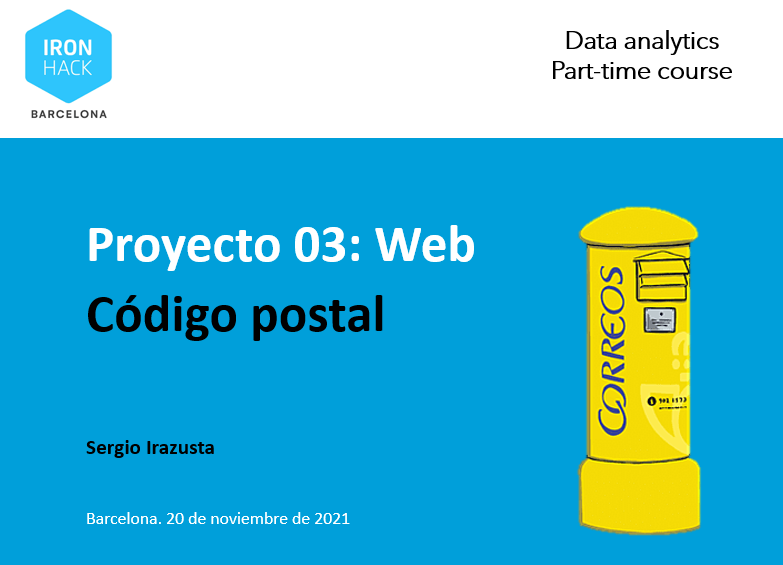

In [214]:
from IPython.display import Image
Image("../Presentaciones/portada3.png")

**Objetivos**
- Sacar el maximo de informacion relevante posible a partir de un codigo postal español

# Bibliotecas

In [2]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
from math import radians, cos, sin, asin, sqrt

# Obtencion de datos de los codigos postales

## Codigos postales Catalunya

Mix de API idescat y scrapping de la pagina:
Cada municipio esta clasificado con un id unico

### Obtencion del id de cada municipio

In [3]:
#Desde esta url saco los id de cada pueblo
url="https://api.idescat.cat/emex/v1/geo.json"
resp=requests.get(url).json()
fichas=resp["fitxes"]["v"]["v"]

dict_keys(['p', 'v', 'lang', 'version', 'o'])

In [4]:
#Localizo los id y el nombre del pueblo
fichas=resp["fitxes"]["v"]["v"]
fichas

[{'scheme': 'com',
  'v': [{'scheme': 'mun', 'id': '430017', 'content': 'Aiguamúrcia'},
   {'scheme': 'mun', 'id': '430056', 'content': 'Alcover'},
   {'scheme': 'mun', 'id': '430108', 'content': 'Alió'},
   {'scheme': 'mun', 'id': '430347', 'content': 'Bràfim'},
   {'scheme': 'mun', 'id': '430363', 'content': 'Cabra del Camp'},
   {'scheme': 'mun', 'id': '430593', 'content': 'Figuerola del Camp'},
   {'scheme': 'mun', 'id': '430666', 'content': 'Garidells, els'},
   {'scheme': 'mun', 'id': '430803', 'content': 'Masó, la'},
   {'scheme': 'mun', 'id': '430831', 'content': 'Milà, el'},
   {'scheme': 'mun', 'id': '430897', 'content': 'Montferri'},
   {'scheme': 'mun', 'id': '430918', 'content': 'Mont-ral'},
   {'scheme': 'mun', 'id': '430982', 'content': 'Nulles'},
   {'scheme': 'mun', 'id': '431080', 'content': 'Pla de Santa Maria, el'},
   {'scheme': 'mun', 'id': '431135', 'content': "Pont d'Armentera, el"},
   {'scheme': 'mun', 'id': '431191', 'content': 'Puigpelat'},
   {'scheme': 'mu

In [5]:
#Junto todos los municipios y sus id
id_cat=[]
for i in fichas:
    for n in i["v"]:
        dic={
            "mun":n["content"],
            "id":n["id"]
        }
        id_cat.append(dic)
id_cat=pd.DataFrame(id_cat)
id_cat

,mun,id
0,Aiguamúrcia,430017
1,Alcover,430056
2,Alió,430108
3,Bràfim,430347
4,Cabra del Camp,430363
...,...,...
942,Tagamanent,082763
943,Vallgorguina,082943
944,Vallromanes,082969
945,Vilalba Sasserra,083067


In [ ]:
#Guardo el df
id_cat.to_csv("id_municipios_catalunya.csv")

In [6]:
#creo una lista con todos los id:
idlista=[]
for i in id_cat.id:
    idlista.append(i)

 ###  codigos postales de cada municipio

#### A traves de scrapping

In [12]:
#Scrapeo la web y creo un df con id,municipio y codigos postales
cp_cat=[]
for i in idlista:
    url=f"https://www.idescat.cat/codis/?id=50&n=9&c={i}&lang=es"
    resp=requests.get(url)
    content=BeautifulSoup(resp.content,"html.parser")
    codigos_postales=content.findAll(("div"),attrs={"class":"ApartCont"})[0].text
    municipio=mun=(content.findAll("h1")[0].text).split(" ")[2]
    lista_cod=re.findall("[0-9]+",codigos_postales)
    for n in lista_cod:
        dic={
            "id":i,
            "municipio":municipio,
            "cp":n
        }
        cp_cat.append(dic)
cp_cat=pd.DataFrame(cp_cat)
#Lo guardo en un csv
cp_cat=pd.read_csv("cp_cat_estudios_sup.csv")

In [13]:
pd.DataFrame(cp_cat)

,id,municipio,cp
0,430017,Aiguamúrcia,43714
1,430017,Aiguamúrcia,43815
2,430056,Alcover,43460
3,430056,Alcover,43461
4,430108,Alió,43813
...,...,...,...
1407,082763,Tagamanent,08593
1408,082943,Vallgorguina,08471
1409,082969,Vallromanes,08188
1410,083067,Vilalba,08455


### A traves de la api

In [18]:
#Creo una funcion que a traves del indicador nos devuelva los codigos postales
def cod_postal(i):
    url=f"https://www.idescat.cat/codis/?id=50&n=9&c={i}&lang=es"
    resp=requests.get(url)
    content=BeautifulSoup(resp.content,"html.parser")
    cp=content.findAll(("div"),attrs={"class":"ApartCont"})[0].text
    mun=(content.findAll("h1")[0].text).split(" ")[2]
    cp2=re.findall("[0-9]+",cp)
    codigos_postales=[]
    for n in cp2:
        dic={
            "id":i,
            "mun":mun,
            "cp":n
        }
        codigos_postales.append(dic)
    return codigos_postales

In [19]:
cod_cat=[]
for i in idlista:
    cod_cat.append(cod_postal(i))
#Como hay municipios con mas de un codigo postal:
cod_cat2=[]
for i in cod_cat:
    if len(i)==1:
        cod_cat2.append(i[0])
    else:
        for n in range(len(i)):
            cod_cat2.append(i[n])
#Creo el df de todos los codigos postales
codigos_cat=pd.DataFrame(cod_cat2)
    

KeyboardInterrupt: 

### Api para sacar mas datos relevantes

In [14]:
#a traves del id de cada municipio obtenemos los siguientes datos
def api(i):
    if len(str(i))==5:
        i="0"+str(i)
    url=f"https://api.idescat.cat/emex/v1/dades.json?id={i}"
    resp=requests.get(url).json()
    try:
        renta=resp["fitxes"]["gg"]["g"][7]["tt"]["t"][2]["ff"]["f"][1]["v"].split(",")[0]
    except IndexError:
            renta="no disponible"
    try:
        poblacion_desocupada=round((float(resp["fitxes"]["gg"]["g"][5]["tt"]["t"][0]["ff"]["f"][1]["v"].split(",")[0])/float(resp["fitxes"]["gg"]["g"][5]["tt"]["t"][0]["ff"]["f"][2]["v"].split(",")[0]))*100,2)
    except KeyError:
        poblacion_desocupada="no disponible"
    try:    
        dic={
                    "id":re.findall("[0-9]+",resp["fitxes"]["p"])[0],
                    "superficie km":resp["fitxes"]["gg"]["g"][0]["tt"]["t"]["ff"]["f"][0]["v"].split(",")[0],
                    "hab/km2":resp["fitxes"]["gg"]["g"][1]["tt"]["t"][0]["ff"]["f"][1]["v"].split(",")[0],
                    "poblacion":resp["fitxes"]["gg"]["g"][1]["tt"]["t"][1]["ff"]["f"][2]["v"].split(",")[0],
                     "% estudios primarios o inf":resp["fitxes"]["gg"]["g"][3]["tt"]["t"]["ff"]["f"][0]["v"].split(",")[0],
                     "% primera etapa secundaria":resp["fitxes"]["gg"]["g"][3]["tt"]["t"]["ff"]["f"][1]["v"].split(",")[0],
                     "% segunda etapa secundaria":resp["fitxes"]["gg"]["g"][3]["tt"]["t"]["ff"]["f"][2]["v"].split(",")[0],
                     "% estudios superiores":resp["fitxes"]["gg"]["g"][3]["tt"]["t"]["ff"]["f"][3]["v"].split(",")[0],
                     "% poblacion desocupada":poblacion_desocupada,
                     "pib por habitante (euros)":resp["fitxes"]["gg"]["g"][7]["tt"]["t"][0]["ff"]["f"][1]["v"].split(",")[0],
                    "renta familiar disponible":renta
                }
        return (dic)
    except Error:
            print(i)

In [17]:
datos_cat=[]
for i in idlista:
    datos_cat.append(api(i))
df_def=pd.DataFrame(datos_cat)
#Elimino los duplicados
df_def=df_def.drop_duplicates()


In [20]:
#Datos de los municipios sin incluir el nombre ni codigo postal
df_def

,id,superficie km,hab/km2,poblacion,% estudios primarios o inf,% primera etapa secundaria,% segunda etapa secundaria,% estudios superiores,% poblacion desocupada,pib por habitante (euros),renta familiar disponible
0,430017,72.95,12.8,930,14.9,36.8,21.3,27.0,44.44,26217.9,no disponible
1,430056,46.00,111.8,5144,17.3,36.1,20.9,25.6,27.86,23.8,15.5
2,430108,7.25,63.2,458,11.2,35.7,24.5,28.5,44.28,47757.7,no disponible
3,430347,6.42,108.3,695,17.7,34.0,21.4,27.0,45.1,31326.0,no disponible
4,430363,26.95,43.6,1175,19.0,35.1,25.4,20.5,36.11,13.0,4091
...,...,...,...,...,...,...,...,...,...,...,...
942,082763,43.31,7.3,318,9.0,24.5,26.6,39.9,46.34,121350.6,no disponible
943,082943,22.13,135.0,2988,8.8,22.9,29.1,39.2,26.85,17.5,6513
944,082969,10.65,240.2,2558,8.5,18.7,24.3,48.5,17.09,23.0,11256
945,083067,6.05,124.5,753,14.1,30.9,26.4,28.6,41.64,50510.7,no disponible


### Df definitivo cataluña

In [23]:
df_cat=pd.merge(cp_cat,df_def,on=("id"))

In [75]:
df_cat

,id,municipio,cp,superficie km,hab/km2,poblacion,% estudios primarios o inf,% primera etapa secundaria,% segunda etapa secundaria,% estudios superiores,% poblacion desocupada,pib por habitante (euros),renta familiar disponible
0,430017,Aiguamúrcia,43714,72.95,12.8,930,14.9,36.8,21.3,27.0,44.44,26217.9,no disponible
1,430017,Aiguamúrcia,43815,72.95,12.8,930,14.9,36.8,21.3,27.0,44.44,26217.9,no disponible
2,430056,Alcover,43460,46.00,111.8,5144,17.3,36.1,20.9,25.6,27.86,23.8,15.5
3,430056,Alcover,43461,46.00,111.8,5144,17.3,36.1,20.9,25.6,27.86,23.8,15.5
4,430108,Alió,43813,7.25,63.2,458,11.2,35.7,24.5,28.5,44.28,47757.7,no disponible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,082763,Tagamanent,08593,43.31,7.3,318,9.0,24.5,26.6,39.9,46.34,121350.6,no disponible
1408,082943,Vallgorguina,08471,22.13,135.0,2988,8.8,22.9,29.1,39.2,26.85,17.5,6513
1409,082969,Vallromanes,08188,10.65,240.2,2558,8.5,18.7,24.3,48.5,17.09,23.0,11256
1410,083067,Vilalba,08455,6.05,124.5,753,14.1,30.9,26.4,28.6,41.64,50510.7,no disponible


In [ ]:
df_cat.to_csv("datos_cat.csv")

## Codigos postales españa

### Scrapping de hacienda

Datos de la renta per capita: "https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfCodPostal/2019/jrubikf44a5ab7a1e14e3ab549262b8a16cecff3a2b06c2.html"

In [100]:
#url correcta cotilleando el inspector
url="https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfCodPostal/2019/jrubikf44a5ab7a1e14e3ab549262b8a16cecff3a2b06c2.html"
resps=requests.get(url)
content=BeautifulSoup(resps.content,"html.parser")
#creo una lista de todas las filas a partir de la segunda 
lista=content.findAll("tr")[1:]

In [102]:
datos=[]
for cp in lista:
    dic={
        "nombre":cp.find("th").text,
        "renta_media_disponible": cp.find("td",attrs={"headers":"table01_c3"}).text
    }
    datos.append(dic)
df=pd.DataFrame(datos)
df

,nombre,renta_media_disponible
0,Almería-04013,21.136
1,04001-Centro Rambla- Centro Paseo- Plaza de To...,36.352
2,04002-La Chanca- Las Cuevas de S.Joaquín- Urb....,17.690
3,04003-Pza.de la Constitución- Cerro San Cristo...,20.935
4,04004-Oliveros- Santa Rita,26.800
...,...,...
681,26006-Varea- La Portalada,23.466
682,26007-La Cava-Fardachón-Las Gaunas-Siete Infan...,26.713
683,26008-San Adrián- La Cava,26.425
684,26009-El Campillo- Polígono Cantabria,22.568


### limpieza del df

Problemas:
 - Valor de la renta no numerico
 - valores iguales en columna nombre

#### Cambio a valor numerico

In [103]:
#cambiamos el Dtype a valor int
df["renta_media_disponible"]=df["renta_media_disponible"].astype(float)

#### Valores iguales en columna nombre

In [104]:
#hay 40 provincias y cada provincia tiene agrupados los municipios que no salen en resto
df["nombre"].value_counts()

Resto                                                      40
30204-Ensanche                                              1
30201-Parque Arqueológico-Cerro Del Molinete                1
41018-Nervión-Sur                                           1
30006-Puente Tocinos                                        1
                                                           ..
04009-El Puche- La Loma- Las Chocillas- Torre Cárdenas      1
33119-Área Trubia                                           1
08172-Sant Cugat Nucleo                                     1
35009-La Isleta                                             1
30162-Santa Cruz                                            1
Name: nombre, Length: 647, dtype: int64

In [105]:
#Creo una lista con los depth_0 que son las capitales: 
municipio_principal=[]
lista2=content.findAll("tr",attrs={"class":"depth_0"})
for i in lista2:
    municipio_principal.append(i.find("th").text)
#Conveirto los nombres de resto
resto=[]
for i in municipio_principal:
    resto.append("resto "+i[1:-6])

In [106]:
#Los sustituyo en el df
contador=0
for i in range(len(df.nombre)):
    if df.nombre[i]=="Resto ":
        df.nombre.loc[i]=resto[contador]
        contador+=1

C:\Users\irazu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [108]:
#Añado columna de codigo postal y quito el codigo de la columna nombre con regex
codigo_postal=[]
for i in range(len(df.nombre)):
    cp=(re.findall("[0-9]+",df.nombre.loc[i]))#saco todos los numeros de cada nombre
    try:
        codigo_postal.append(cp[0])#Como en algun nombre hay numeros que no corresponden al codigo postal soloc ojo el primero
        df.nombre.loc[i]=(re.sub(cp[0],"",df.nombre.loc[i])) #quito el cp
    except IndexError:
        codigo_postal.append(df.nombre.loc[i])
df["Codigo_postal"]=codigo_postal


C:\Users\irazu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
#Quito los guiones
for i in range(len(df.nombre)):
    if re.findall("-",df.nombre.loc[i]):
        df.nombre.loc[i]=(re.sub("-"," ",df.nombre.loc[i]))

C:\Users\irazu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
#Cambio el codigo de resto Ciudad por el inicio de su cp 
for i in range(len(df.Codigo_postal)):
    if df.Codigo_postal[i].isnumeric():
        continue
    else:
        print(df.Codigo_postal[i])

resto Almería
resto Jerez de la Frontera
resto Córdoba
resto Granada
resto Málaga
resto Sevilla
resto Zaragoza
resto Gijón
resto Oviedo
resto Palma de Mallorca
resto Palmas de Gran Canaria Las
resto Santa Cruz de Tenerife
resto Santander
resto Burgos
resto Valladolid
resto Albacete
resto Badalona
resto Barcelona
resto Hospitalet de Llobregat
resto Sabadell
resto Sant Cugat del Vallès
resto Terrassa
resto Alicante/Alacant
resto Elche/Elx
resto Castellón de la Plana/Castelló de la Plana
resto Valencia
resto Coruña A
resto Vigo
resto Alcalá de Henares
resto Alcobendas
resto Alcorcón
resto Getafe
resto Leganés
resto Madrid
resto Móstoles
resto Pozuelo de Alarcón
resto Las Rozas
resto Cartagena
resto Murcia
resto Logroño


In [111]:
#Cambios
dicc={
    "resto Almería": "04"   ,
    "resto Jerez de la Frontera": "11"   ,
    "resto Córdoba":  "14"  ,
    "resto Granada":   "18" ,
    "resto Málaga":   "29" ,
    "resto Sevilla":   "41" ,
    "resto Zaragoza": "50"   ,
    "resto Gijón":   "333" ,
    "resto Oviedo":  "331"  ,
    "resto Palma de Mallorca": "07"   ,
    "resto Palmas de Gran Canaria Las": "35"    ,
    "resto Santa Cruz de Tenerife":   "38" ,
    "resto Santander":  "39"  ,
    "resto Burgos":  "09"  ,
    "resto Valladolid": "47"   ,
    "resto Albacete":  "02",
    "resto Badalona":  "0891"  ,
    "resto Barcelona":   "080" ,
    "resto Hospitalet de Llobregat": "0890"   ,
    "resto Sabadell":  "0820",
    "resto Sant Cugat del Vallès": "0819"   ,
    "resto Terrassa":  "0822"  ,
    "resto Alicante/Alacant":  "036"  ,
    "resto Elche/Elx":   "033" ,
    "resto Castellón de la Plana/Castelló de la Plana":  "12",
    "resto Valencia": "46"   ,
    "resto Coruña A":  "15"  ,
    "resto Vigo":  "36"  ,
    "resto Alcalá de Henares":  "288" ,
    "resto Alcobendas": "281"   ,
    "resto Alcorcón": "2892"   ,
    "resto Getafe":  "2890"  ,
    "resto Leganés":  "2891"  ,
    "resto Madrid":   "280" ,
    "resto Móstoles":  "2893"  ,
    "resto Pozuelo de Alarcón": "2822"   ,
    "resto Las Rozas":  "2820"  ,
    "resto Cartagena": "305"   ,
    "resto Murcia":   "308" ,
    "resto Logroño":"26"
    
}

In [112]:
df.Codigo_postal.replace(dicc,inplace=True)

In [221]:
df.to_csv("renta_cp_spain.csv")

### Api de todos los codigos con longitud y latitud

Direccion web: http://api.zippopotam.us/

In [25]:
def infor(cp):
    url=f"http://api.zippopotam.us/ES/{cp}"
    resp=requests.get(url).json()
    df=pd.DataFrame(resp["places"])
    return df
#ejemplo
infor("08029")

,place name,longitude,state,state abbreviation,latitude
0,Barcelona,2.1482,Cataluna,CT,41.386


# Clase CodigoPostal ()

In [215]:
class CodigoPostal():
    #VALIDAR SI EL CODIGO EXISTE
    def __init__(self,cp=None):
        #Podria poner un input
        self.cp=input("Introduce un codigo postal")
        print("Esta clase tiene las siguientes funciones:")
        print("codigo.informacion(): Para informacion general")
        print("codigo.renta(): Para conocer la renta media disponible de ese codigo postal")
        print("codigo.obtener_distancia(): Para conocer la distancia entre ese codigo postal y la clinica")        
   
    #informacion generalcon una api    
    def informacion(self):
        if self.cp in df_cat.values:
            return df_cat[df_cat["cp"]==self.cp]
        else:       
            url=f"http://api.zippopotam.us/ES/{self.cp}"
            resp=requests.get(url).json()
            try:
                df=pd.DataFrame(resp["places"])
            except KeyError:
                print("El codigo postal no aparece en la base de datos, comprueba que sea correcto.")
                df="no disponible"
            return df
    #Para acceder informacion de latitud y longitud y a cp de fuera
    #OPTIMIZAR
    def infor(self):
        url=f"http://api.zippopotam.us/ES/{self.cp}"
        resp=requests.get(url).json()
        try:
            df=pd.DataFrame(resp["places"])
        except KeyError:
            print("El codigo postal no aparece en la base de datos, comprueba que sea correcto.")
            df="no disponible"
        return df
    
    #Buscar mas municipios
    def renta(self):
        try:
            if self.cp in df.values:
                return (list(df[df["Codigo_postal"]==self.cp]["renta_media_disponible"])[0])
            elif self.cp[:4] in df.values:
                return (list(df[df["Codigo_postal"]==self.cp[:4]]["renta_media_disponible"])[0])
            elif self.cp[:3] in df.values:
                return (list(df[df["Codigo_postal"]==self.cp[:3]]["renta_media_disponible"])[0])
            elif self.cp[:2] in df.values:
                return (list(df[df["Codigo_postal"]==self.cp[:2]]["renta_media_disponible"])[0])  
            else:
                print("no hay datos de ese codigo postal en referencia a la renta")
                return("no disponible")
        except KeyError:
            print("no hay datos de ese codigo postal en referencia a la renta")
            return("no disponible")

    #Añadir posibilidad de elegir codigo postal
    def obtener_distancia(self):
        try:
            #Establezco la longitud y la latitud del codigo postal de la clinica sobre la que quiero calcular la distancia
            lon1=2.0465
            lat1=41.4734
            #Y las del codigo postal que he buscado
            lat2=float(infor(self.cp)["latitude"].item())
            lon2=float(infor(self.cp)["longitude"].item())
             # convert decimal degrees to radians 
            lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
            # haversine formula 
            dlon = lon2 - lon1 
            dlat = lat2 - lat1 
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * asin(sqrt(a)) 
            # Radius of earth in kilometers is 6371
            km = round(6371* c,2) 
            print(f'{km} km de distancia entre el codigo postal {self.cp} y 08190 de San cugat')
            return km
        except KeyError:
            return("Hay un error con el codigo postal.")

    

In [216]:
cod=CodigoPostal()

Introduce un codigo postal28002
Esta clase tiene las siguientes funciones:
codigo.informacion(): Para informacion general
codigo.renta(): Para conocer la renta media disponible de ese codigo postal
codigo.obtener_distancia(): Para conocer la distancia entre ese codigo postal y la clinica


In [217]:
cod.renta()

43.212

In [218]:
cod.informacion()

,place name,longitude,state,state abbreviation,latitude
0,Madrid,-3.674,Madrid,M,40.4391


In [219]:
cod.obtener_distancia()

493.85 km de distancia entre el codigo postal 28002 y 08190 de San cugat


493.85

In [220]:
cod.infor()

,place name,longitude,state,state abbreviation,latitude
0,Madrid,-3.674,Madrid,M,40.4391
